In [1]:
#Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [3]:
os.chdir("D:\\DS\\Python DS\\Sample\\Time Series 3\\")

In [4]:
#read file
dataset=pd.read_csv("BOE-XUDLERD.csv")
# pd.read_csv("time.csv")

In [5]:
dataset

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
5,2017-11-02,0.8567
6,2017-11-01,0.8608
7,2017-10-31,0.8584
8,2017-10-30,0.8601
9,2017-10-27,0.8635


In [6]:
dataset['Date']=pd.to_datetime(dataset["Date"], infer_datetime_format=True)
Idataset=dataset.set_index(['Date'])

In [7]:
from datetime import datetime
Idataset.head(5)

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608


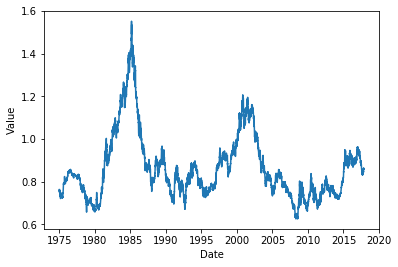

In [9]:
#plot
plt.xlabel("Date")
plt.ylabel("Value")
plt.plot(Idataset)

In [10]:
#rolling for 12 months
rolmean=Idataset.rolling(window=12).mean()
rolstd=Idataset.rolling(window=12).std()
print(rolmean, rolstd)

               Value
Date                
2017-11-09       NaN
2017-11-08       NaN
2017-11-07       NaN
2017-11-06       NaN
2017-11-03       NaN
2017-11-02       NaN
2017-11-01       NaN
2017-10-31       NaN
2017-10-30       NaN
2017-10-27       NaN
2017-10-26       NaN
2017-10-25  0.859325
2017-10-24  0.858483
2017-10-23  0.857508
2017-10-20  0.856217
2017-10-19  0.854600
2017-10-18  0.853625
2017-10-17  0.853150
2017-10-16  0.852058
2017-10-13  0.850933
2017-10-12  0.849608
2017-10-11  0.848000
2017-10-10  0.847308
2017-10-09  0.847742
2017-10-06  0.847908
2017-10-05  0.848092
2017-10-04  0.848250
2017-10-03  0.848842
2017-10-02  0.849100
2017-09-29  0.848683
...              ...
1975-02-12  0.733567
1975-02-11  0.735342
1975-02-10  0.736883
1975-02-07  0.738325
1975-02-06  0.740100
1975-02-05  0.741617
1975-02-04  0.743133
1975-02-03  0.743758
1975-01-31  0.744233
1975-01-30  0.744708
1975-01-29  0.745100
1975-01-28  0.744883
1975-01-27  0.744025
1975-01-24  0.743575
1975-01-23  0

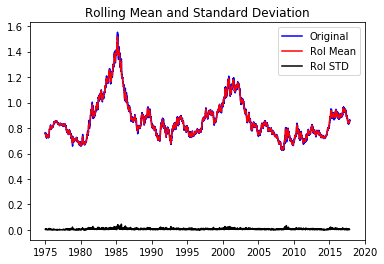

In [11]:
#Rolling Mean and Standard Deviation
orig=plt.plot(Idataset, color="blue", label="Original")
mean=plt.plot(rolmean, color="red", label="Rol Mean")
std=plt.plot(rolstd, color="black", label="Rol STD")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [12]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print("Augmented Dickey Fuller Test")
dftest=adfuller(Idataset["Value"], autolag="AIC")
dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print(dfoutput)

Augmented Dickey Fuller Test
ADF Test Statistic         -2.054793
P-Value                     0.263077
#Lags                      21.000000
#obs                    10815.000000
Critical Value (1%)        -3.430955
Critical Value (5%)        -2.861807
Critical Value (10%)       -2.566912
dtype: float64


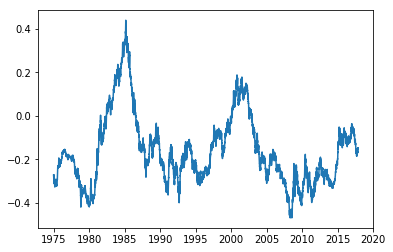

In [13]:
#Trend - Y value Changed
Idataset_log = np.log(Idataset)
plt.plot(Idataset_log)

In [14]:
Idataset_log.head(10)
Idataset_log.isnull().sum()

Value    0
dtype: int64

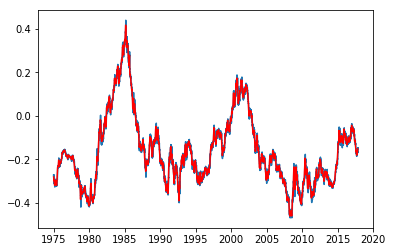

In [15]:
#Moving for 12 months
mavg=Idataset_log.rolling(window=12).mean()
mstd=Idataset_log.rolling(window=12).std()
plt.plot(Idataset_log)
plt.plot(mavg, color="red")

In [16]:
#remove Nan
Idataset_log_mvavg=Idataset_log-mavg
Idataset_log_mvavg.head(12)

,Value
Date,
2017-11-09,NaN
2017-11-08,NaN
2017-11-07,NaN
2017-11-06,NaN
2017-11-03,NaN
2017-11-02,NaN
2017-11-01,NaN
2017-10-31,NaN
2017-10-30,NaN


In [17]:
#Remove NAN
Idataset_log_mvavg.dropna(inplace=True)
Idataset_log_mvavg.head(10)

,Value
Date,
2017-10-25,-0.014786
2017-10-24,-0.009677
2017-10-23,-0.007129
2017-10-20,-0.009150
2017-10-19,-0.012811
2017-10-18,-0.005290
2017-10-17,-0.002499
2017-10-16,-0.005106
2017-10-13,-0.007094


In [18]:
#ADF Test Function
def test_stats(timeseries):
    
    #rolling Statistic
    mavg=timeseries.rolling(window=12).mean()
    mstd=timeseries.rolling(window=12).std()
    
    #Plot
    #Rolling Mean and Standard Deviation
    orig=plt.plot(Idataset, color="blue", label="Original")
    mean=plt.plot(rolmean, color="red", label="Rol Mean")
    std=plt.plot(rolstd, color="black", label="Rol STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)

    #Augmented Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print("Augmented Dickey Fuller Test")
    dftest=adfuller(Idataset["Value"], autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)

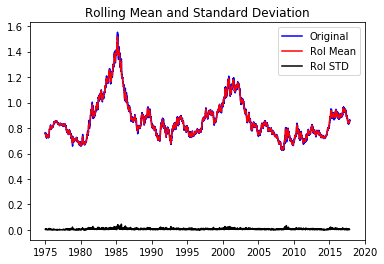

Augmented Dickey Fuller Test
ADF Test Statistic         -2.054793
P-Value                     0.263077
#Lags                      21.000000
#obs                    10815.000000
Critical Value (1%)        -3.430955
Critical Value (5%)        -2.861807
Critical Value (10%)       -2.566912
dtype: float64


In [19]:
#plot
test_stats(Idataset_log_mvavg)

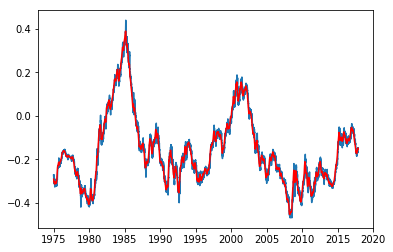

In [20]:
#Exponential Decay Weighted Avg
wavg=Idataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Idataset_log)
plt.plot(wavg, color="red")

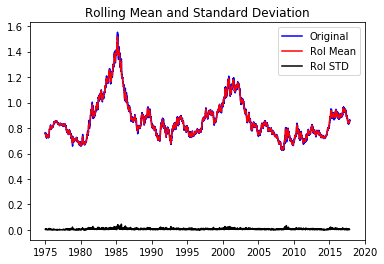

Augmented Dickey Fuller Test
ADF Test Statistic         -2.054793
P-Value                     0.263077
#Lags                      21.000000
#obs                    10815.000000
Critical Value (1%)        -3.430955
Critical Value (5%)        -2.861807
Critical Value (10%)       -2.566912
dtype: float64


In [21]:
#dataset Scale - Wavg
d_avg=Idataset_log- wavg
test_stats(d_avg)

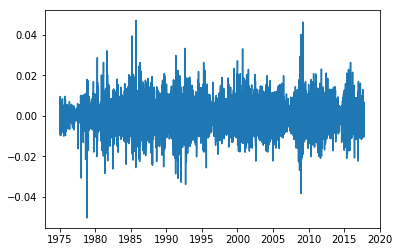

In [22]:
#check - D value - Intigrated
Idataset_log_diff=Idataset_log - Idataset_log.shift()
plt.plot(Idataset_log_diff)

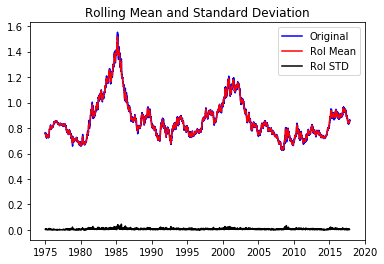

Augmented Dickey Fuller Test
ADF Test Statistic         -2.054793
P-Value                     0.263077
#Lags                      21.000000
#obs                    10815.000000
Critical Value (1%)        -3.430955
Critical Value (5%)        -2.861807
Critical Value (10%)       -2.566912
dtype: float64


,Value
Date,
2017-11-08,0.003249
2017-11-07,0.000926
2017-11-06,-0.000926
2017-11-03,-0.002668
2017-11-02,-0.004774
2017-11-01,0.004774
2017-10-31,-0.002792
2017-10-30,0.001978
2017-10-27,0.003945


In [23]:
#drop NAN and ADF Test
Idataset_log_diff.dropna(inplace=True)
test_stats(Idataset_log_diff)
Idataset_log_diff.head(10)

In [24]:
Idataset_log.dropna(inplace=True)

In [25]:
# #Model
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(Idataset_log)


trend = decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(Idataset_log, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

decomlog=residual
decomlog.dropna(inplace=True)
test_stats(decomlog)

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

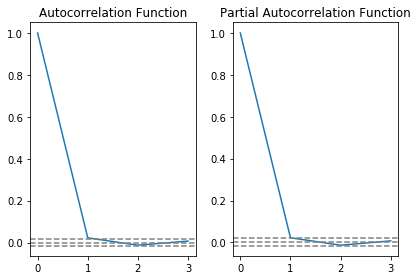

In [26]:
#acf & PACF
from statsmodels.tsa.stattools import acf, pacf
# Idataset_log_diff.fillna(Idataset_log_diff.mean())
lag_acf = acf(Idataset_log_diff, nlags=3)
lag_pacf = pacf(Idataset_log_diff, nlags=3, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot ACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()



D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


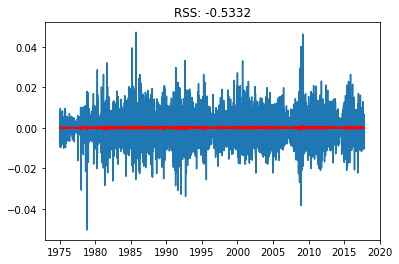

In [28]:
#Arima
from statsmodels.tsa.arima_model import ARIMA

#AR
model=ARIMA(Idataset_log, order=(1,1,1))
result_AR=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_AR.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_AR.fittedvalues - Idataset_log_diff["Value"]**2)))
print("Plotting AR Model")

D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


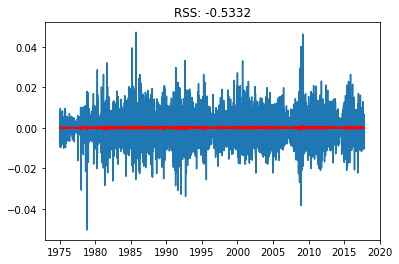

In [30]:
#ARIMA
model=ARIMA(Idataset_log, order=(1,1,1))
result_ARIMA=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_ARIMA.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_ARIMA.fittedvalues - Idataset_log_diff["Value"]**2)))
print("Plotting ARIMA Model")

In [31]:
pred_arima_diff=pd.Series(result_ARIMA.fittedvalues, copy=True)
print(pred_arima_diff.head())

Date
2017-11-08   -0.000011
2017-11-07    0.000065
2017-11-06   -0.000024
2017-11-03   -0.000027
2017-11-02   -0.000066
dtype: float64


In [32]:
p_arima_diff_cumsum=pred_arima_diff.cumsum()
print(p_arima_diff_cumsum)

Date
2017-11-08   -0.000011
2017-11-07    0.000054
2017-11-06    0.000030
2017-11-03    0.000003
2017-11-02   -0.000063
2017-11-01   -0.000161
2017-10-31   -0.000020
2017-10-30   -0.000166
2017-10-27   -0.000068
2017-10-26   -0.000036
2017-10-25   -0.000314
2017-10-24   -0.000419
2017-10-23   -0.000289
2017-10-20   -0.000331
2017-10-19   -0.000411
2017-10-18   -0.000521
2017-10-17   -0.000336
2017-10-16   -0.000384
2017-10-13   -0.000469
2017-10-12   -0.000524
2017-10-11   -0.000535
2017-10-10   -0.000546
2017-10-09   -0.000501
2017-10-06   -0.000379
2017-10-05   -0.000442
2017-10-04   -0.000390
2017-10-03   -0.000521
2017-10-02   -0.000463
2017-09-29   -0.000467
2017-09-28   -0.000653
                ...   
1975-02-12   -0.119814
1975-02-11   -0.119675
1975-02-10   -0.119720
1975-02-07   -0.119706
1975-02-06   -0.119614
1975-02-05   -0.119615
1975-02-04   -0.119574
1975-02-03   -0.119593
1975-01-31   -0.119814
1975-01-30   -0.119814
1975-01-29   -0.119846
1975-01-28   -0.119812
1975-0

In [33]:
p_arima_log=pd.Series(Idataset_log["Value"].ix[0], index=Idataset_log.index)
p_arima_log=p_arima_log.add(p_arima_diff_cumsum, fill_value=0)
p_arima_log.head()

D:\DS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
1975-01-02   -0.270115
1975-01-03   -0.270246
1975-01-06   -0.270342
1975-01-07   -0.270194
1975-01-08   -0.270181
dtype: float64

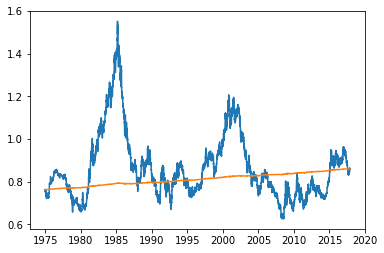

In [34]:
p_arima=np.exp(p_arima_log)
plt.plot(Idataset)
plt.plot(p_arima)

In [35]:
#Prediction
Idataset_log

,Value
Date,
2017-11-09,-0.150474
2017-11-08,-0.147225
2017-11-07,-0.146298
2017-11-06,-0.147225
2017-11-03,-0.149893
2017-11-02,-0.154667
2017-11-01,-0.149893
2017-10-31,-0.152685
2017-10-30,-0.150707


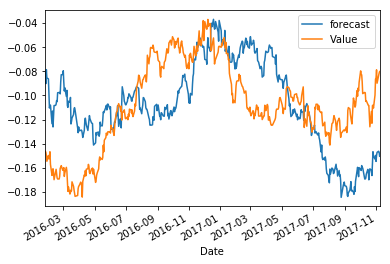

In [36]:
result_ARIMA.plot_predict(1,455)
x=result_ARIMA.forecast(steps=90)